In [1]:
# Source : https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


In [2]:
df = pd.read_csv("data.csv")
df.head(5)    # To display the top 5 rows         

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5)                        # To display the botton 5 rows

In [3]:
df.dtypes # To display the types of each feature of the dataframe

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
# To drop unused columns of the dataframe
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [5]:
# To rename columns of the dataframe
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
df.shape

(11914, 10)

In [7]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.head()
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [8]:
# To drop the duplicates rows of the dataframe
df = df.drop_duplicates()

In [9]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [11]:
# To identify which columns have null values and how many 
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

<Axes: xlabel='Price'>

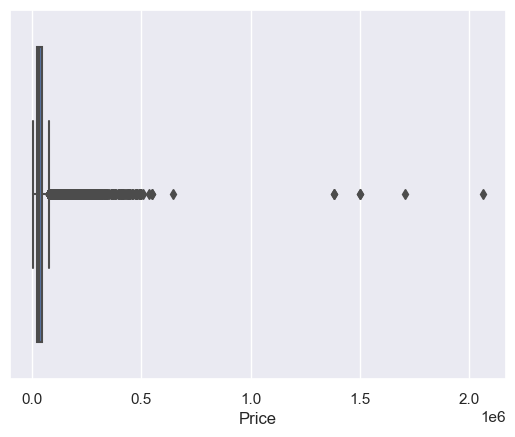

In [13]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

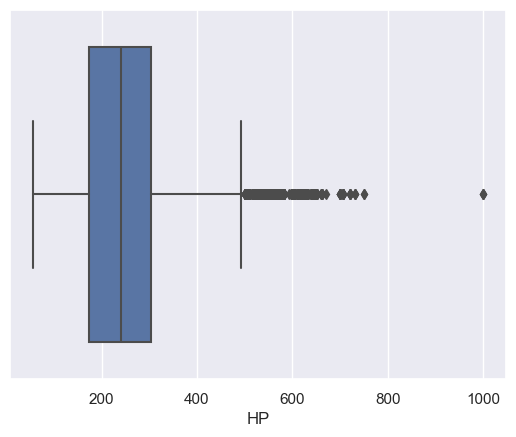

In [14]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

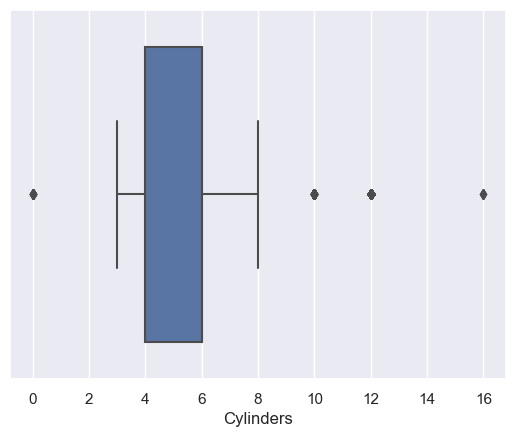

In [15]:
sns.boxplot(x=df['Cylinders'])

,HP,Price,Cylinders
0,335.0,46135,6.0
1,300.0,40650,6.0
2,300.0,36350,6.0
3,230.0,29450,6.0
4,230.0,34500,6.0
...,...,...,...
11909,300.0,46120,6.0
11910,300.0,56670,6.0
11911,300.0,50620,6.0
11912,300.0,50920,6.0


In [28]:
Q1 = df[['HP','Price','Cylinders']].quantile(0.25)
Q3 = df[['HP','Price','Cylinders']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df2 = df[~((df[['HP','Price','Cylinders']] < (Q1 - 1.5 * IQR)) |(df[['HP','Price','Cylinders']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape


HP             130.0
Price        21327.5
Cylinders        2.0
dtype: float64


(9836, 10)

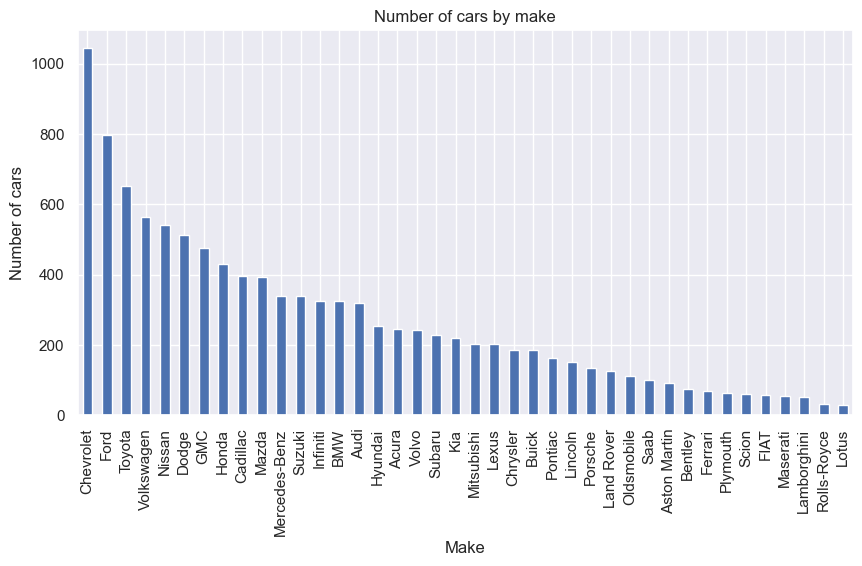

In [27]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.356179,-0.116463,0.326445,0.303093,0.651844
HP,0.356179,1.000000,0.708240,-0.392446,-0.501307,0.737031
Cylinders,-0.116463,0.708240,1.000000,-0.617747,-0.676358,0.328387
MPG-H,0.326445,-0.392446,-0.617747,1.000000,0.808545,-0.057540
MPG-C,0.303093,-0.501307,-0.676358,0.808545,1.000000,-0.124802
Price,0.651844,0.737031,0.328387,-0.057540,-0.124802,1.000000


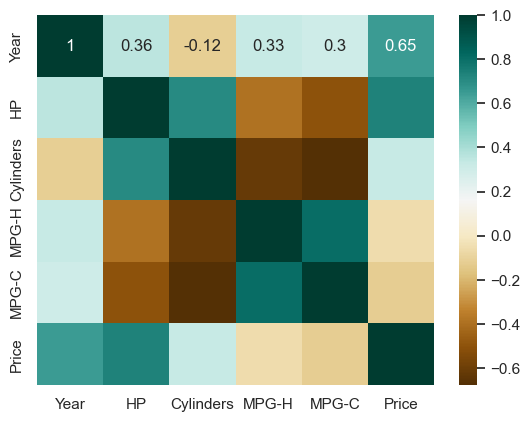

In [30]:
c=df2.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c

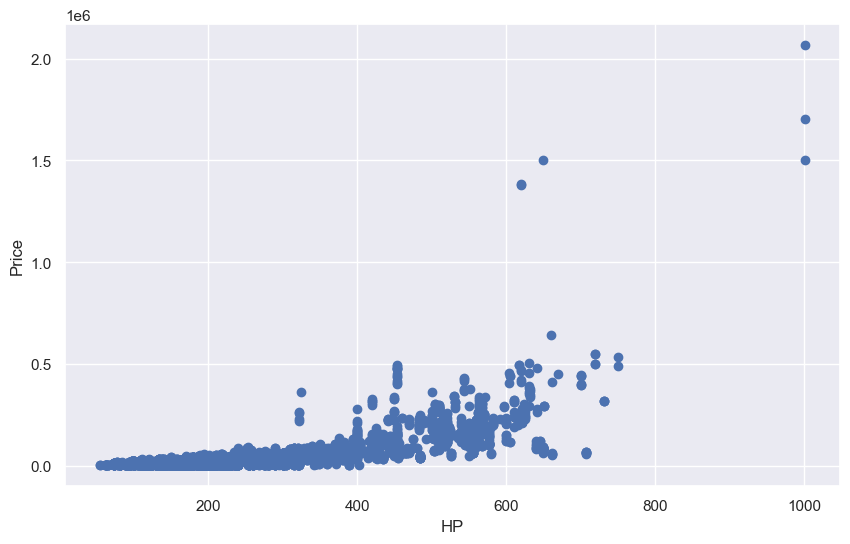

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()